# Python Basics for Machine Learning **Clustering**

## Authors:
- Alan Song
- DeLi Zhang

# Table of Contents
1. Naive clustering demo
- k means clustering

Uncomment the necessary lines below if your environment is missing

In [1]:
# !pip install -U scikit-learn

# Naive clustering demo: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('hardness3D.csv')
label_encoder = LabelEncoder()
data["Hardness"] = label_encoder.fit_transform(data["Hardness"]) # tranfer hardness type into type 0, 1, 2
data

Density (g/cm³)  Elastic Modulus (GPa)      Corr1  Hardness
0           3.072218             117.174077  17.290795         2
1           2.651626              89.026629  12.618135         2
2           2.762253             111.329840  14.897056         2
3           3.124346              78.778236  13.179972         2
4           2.887866             106.542386  14.967844         2
..               ...                    ...        ...       ...
185         4.313737             143.828243   5.201614         0
186         3.116676             163.190988   2.125425         0
187         4.150954             185.639301  11.795096         0
188         3.861267             143.618252   1.329720         0
189         5.849581             176.079914  18.176303         0

[190 rows x 4 columns]

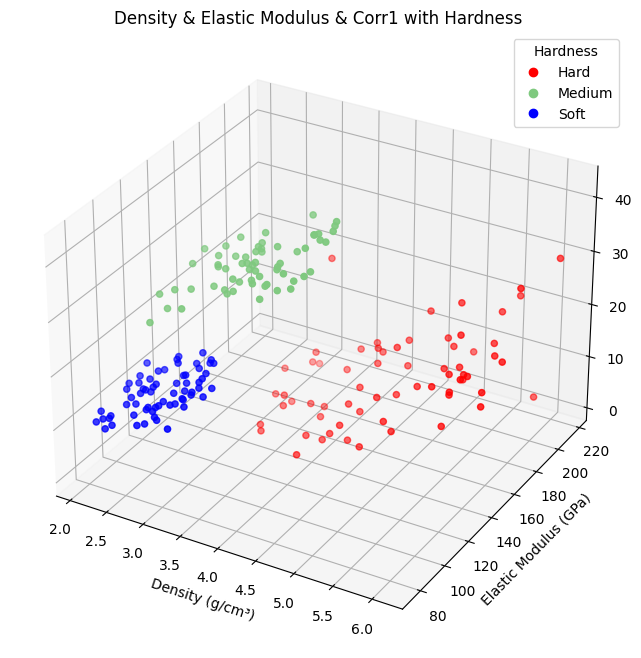

In [4]:
# set colours
color_map1 = ["#FF0000", "#7FC97F", "#0000FF"]

import matplotlib
# matplotlib.use("WebAgg")

fig = plt.figure(figsize=(10, 8), dpi=100)
ax = fig.add_subplot(111, projection='3d')

# the colors represent the type of hardness
colors = data["Hardness"].apply(lambda x: color_map1[x])
scatter = ax.scatter(data["Density (g/cm³)"], data["Elastic Modulus (GPa)"], data["Corr1"], c=colors)

# labels & title
ax.set_xlabel("Density (g/cm³)")
ax.set_ylabel("Elastic Modulus (GPa)")
ax.set_zlabel("Corr1")
plt.title("Density & Elastic Modulus & Corr1 with Hardness")

# set legend
legend_labels = ['Hard', 'Medium','Soft']
scatter_proxy = [plt.Line2D([0],[0], linestyle="none", c=color_map1[i], marker = 'o') for i in range(len(legend_labels))]
ax.legend(scatter_proxy, legend_labels, title='Hardness')

plt.show()


## Before performing K-means clustering, the data is pre-processed such that each feature has a mean centered at zero and a standard deviation of 1.

**Try modifying:** Run the K-means clustering on the un-scaled feature vector ``feature_vect`` instead to see what happens

The following scales the feature vector as a pre-processing step such that features have zero mean and
unit variance.

In [35]:
from sklearn.preprocessing import StandardScaler

feature_vect = data.drop("Hardness", axis=1).to_numpy()
scaler = StandardScaler().fit(feature_vect)
feat_vec_scale = scaler.transform(feature_vect)

print("mean: ", feat_vec_scale.mean(axis=0))
print("std. deviation: ", feat_vec_scale.std(axis=0))

mean:  [-1.49587944e-16  3.73969861e-16 -2.79308740e-16]
std. deviation:  [1. 1. 1.]


## and we start training with K-means clustering method

In [39]:
from sklearn.cluster import KMeans

K = 3
# Fit K-means model
# CHANGE the number of clusters generated
kmeans = KMeans(n_clusters=K).fit(feat_vec_scale)

# CHANGE to the unscaled/un-whitened feature_vect to see what happens!
lbl = kmeans.labels_
centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(feat_vec_scale)

y_kmeans

/home/alan/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

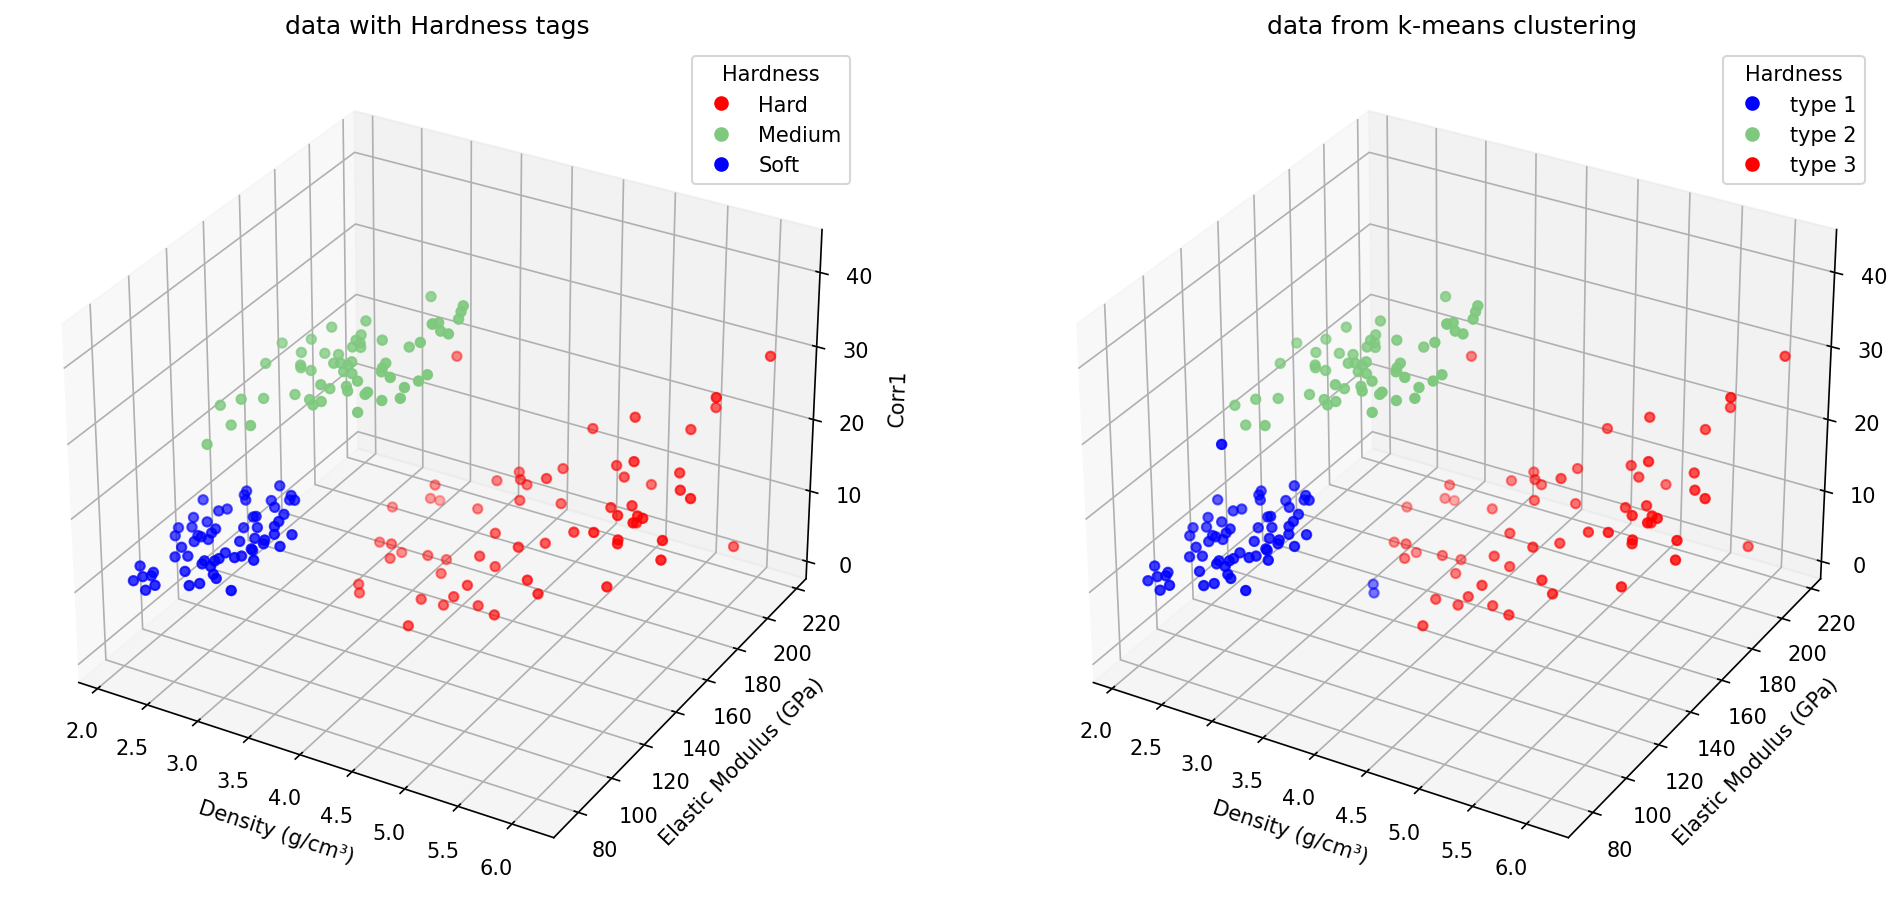

In [63]:
fig = plt.figure(figsize=(16, 8), dpi=150)

# subplot 1
ax = fig.add_subplot(121, projection='3d')

color_map1 = ["#FF0000", "#7FC97F", "#0000FF"]
# the colors represent the type of hardness
colors = data["Hardness"].apply(lambda x: color_map1[x])
scatter = ax.scatter(data["Density (g/cm³)"], data["Elastic Modulus (GPa)"], data["Corr1"], c=colors)

# labels & title
ax.set_xlabel("Density (g/cm³)")
ax.set_ylabel("Elastic Modulus (GPa)")
ax.set_zlabel("Corr1")
plt.title("data with Hardness tags")

# set legend
legend_labels = ['Hard', 'Medium','Soft']
scatter_proxy = [plt.Line2D([0],[0], linestyle="none", c=color_map1[i], marker = 'o') for i in range(len(legend_labels))]
ax.legend(scatter_proxy, legend_labels, title='Hardness')


# subplot 2
ax = fig.add_subplot(122, projection='3d')

color_map2 = ["#0000FF", "#7FC97F",  "#FF0000"]
colors = [color_map2[x] for x in y_kmeans]
scatter = ax.scatter(data["Density (g/cm³)"], data["Elastic Modulus (GPa)"], data["Corr1"], c=colors)

# labels & title
ax.set_xlabel("Density (g/cm³)")
ax.set_ylabel("Elastic Modulus (GPa)")
ax.set_zlabel("Corr1")
plt.title("data from k-means clustering")

# set legend
legend_labels = ['type 1', 'type 2','type 3']
scatter_proxy = [plt.Line2D([0],[0], linestyle="none", c=color_map2[i], marker = 'o') for i in range(len(legend_labels))]
ax.legend(scatter_proxy, legend_labels, title='Hardness')


plt.show()